# Problem Statement:-
### Write Python program to implement CNN object detection. Discuss numerous performance evaluation metrics for evaluating the object detecting algorithms' performance. 

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test)= datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes =["airplane", "automobile","bird","cat","deer","dog","frog","horse","ship","truck" ]

In [7]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

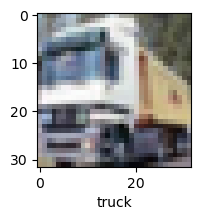

In [8]:
plot_sample(x_train, y_train,1)

In [9]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
x_train=x_train/255 #normalization values between 1 and 0
x_test=x_test/255

In [11]:
#CNN
cnn=models.Sequential([
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(64,  activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4760 - accuracy: 0.4664
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1566 - accuracy: 0.5926
Epoch 3/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.0395 - accuracy: 0.6354
Epoch 4/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9614 - accuracy: 0.6664
Epoch 5/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9036 - accuracy: 0.6852
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8608 - accuracy: 0.7002
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8197 - accuracy: 0.7121
Epoch 8/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7882 - accuracy: 0.7215
Epoch 9/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7530 - accuracy: 0.7357
Epoch 10/10
1563/1563 [==============================] - 66s 42m

### Accuracy

In [14]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9495 - accuracy: 0.6758


[0.9495453834533691, 0.6758000254631042]

In [15]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

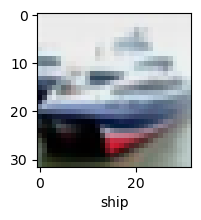

In [16]:
plot_sample(x_test, y_test,1)

In [17]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 11ms/step


array([[9.3951379e-04, 1.9229983e-05, 1.2208713e-02, 9.0520859e-01,
        5.9277304e-06, 6.3974939e-02, 1.6085261e-03, 3.3350356e-04,
        1.5596884e-02, 1.0407992e-04],
       [9.2957279e-04, 2.0891814e-03, 5.3033662e-09, 7.9130970e-08,
        2.9495939e-10, 9.1970442e-10, 1.0270505e-08, 2.1739300e-08,
        9.9686533e-01, 1.1575789e-04],
       [5.1508758e-02, 4.5576212e-01, 4.2116004e-03, 8.8052694e-03,
        2.3369290e-04, 4.3327012e-04, 6.4238164e-05, 2.4947280e-04,
        4.6974081e-01, 8.9907479e-03],
       [8.5656512e-01, 2.8040591e-03, 2.2409290e-02, 2.3489879e-03,
        7.1037170e-03, 5.1423980e-05, 6.7036519e-05, 7.7419485e-05,
        1.0854657e-01, 2.6304780e-05],
       [1.1640183e-06, 1.0241652e-06, 1.9933427e-02, 1.1266646e-02,
        7.2487813e-01, 2.7177641e-03, 2.4119529e-01, 5.8691412e-06,
        4.3892214e-07, 3.4002352e-07]], dtype=float32)

In [18]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [19]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

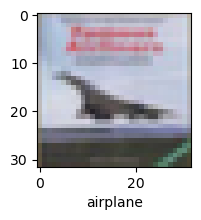

In [20]:
plot_sample(x_test, y_test, 3)

### Evaluated Output and Metrics

In [21]:
classes[y_classes[3]]

'airplane'

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=cnn.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification report: \n", classification_report(y_test, y_classes))

313/313 [==============================] - 4s 11ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.65      0.75      0.70      1000
           1       0.77      0.82      0.79      1000
           2       0.53      0.61      0.57      1000
           3       0.48      0.54      0.51      1000
           4       0.72      0.49      0.58      1000
           5       0.63      0.51      0.56      1000
           6       0.79      0.74      0.77      1000
           7       0.66      0.77      0.71      1000
           8       0.78      0.80      0.79      1000
           9       0.82      0.73      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000

